In [16]:
# 1. In the above dataset,
# a. In case age is less than 18, replace it with mean of age values.

import pandas as pd
import numpy as np

customerAcquisitionDF = pd.read_excel('Credit Card Data.xlsx',sheet_name='Customer Acqusition')
display(customerAcquisitionDF.tail().reset_index(drop=True))

customerAcquisitionDF['Age'] = np.where(customerAcquisitionDF['Age']<18,customerAcquisitionDF['Age'].mean(),customerAcquisitionDF['Age'])
display(customerAcquisitionDF.tail().reset_index(drop=True))

,No,Customer,Age,City,Product,Limit,Company,Segment
0,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt
1,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt
2,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary
3,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed
4,100,A100,8.729077,COCHIN,Silver,100000,C5,Salaried_MNC


,No,Customer,Age,City,Product,Limit,Company,Segment
0,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt
1,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt
2,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary
3,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed
4,100,A100,37.461847,COCHIN,Silver,100000,C5,Salaried_MNC


In [17]:
# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
# (customer’s limit provided in acquisition table is the per transaction limit on his card)

spendDF = pd.read_excel('Credit Card Data.xlsx',sheet_name='Spend')
display(spendDF.tail().reset_index(drop=True))

CustomersMergedDF = customerAcquisitionDF.merge(spendDF, how = 'inner', validate='one_to_many',left_on='Customer', right_on='Customer')
display(CustomersMergedDF.tail().reset_index(drop=True))

CustomersMergedDF['Amount'] = np.where(CustomersMergedDF['Amount']> CustomersMergedDF['Limit'],
                                       CustomersMergedDF['Amount']/2,
                                       CustomersMergedDF['Amount']) 

display(CustomersMergedDF.tail().reset_index(drop=True))
#OR, Displaying just those records which got modified below..
display(CustomersMergedDF.loc[CustomersMergedDF.Amount > CustomersMergedDF.Limit].tail().reset_index(drop=True))

,Sl No:,Customer,Month,Type,Amount
0,1496,A67,2006-02-04,BUS TICKET,418316.710886
1,1497,A68,2006-03-25,BUS TICKET,222182.008427
2,1498,A69,2006-03-31,BUS TICKET,100049.079260
3,1499,A70,2006-03-23,BUS TICKET,316308.254003
4,1500,A71,2006-03-24,BUS TICKET,330483.743568


,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt,98,2004-01-25,BIKE,94369.178802
1,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt,99,2004-01-12,AUTO,134404.666159
2,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary,100,2004-01-03,SHOPPING,446110.920182
3,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed,101,2004-01-15,AIR TICKET,108137.195169
4,100,A100,37.461847,COCHIN,Silver,100000,C5,Salaried_MNC,102,2004-01-25,BUS TICKET,46251.298231


,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt,98,2004-01-25,BIKE,94369.178802
1,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt,99,2004-01-12,AUTO,67202.333079
2,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary,100,2004-01-03,SHOPPING,223055.460091
3,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed,101,2004-01-15,AIR TICKET,54068.597585
4,100,A100,37.461847,COCHIN,Silver,100000,C5,Salaried_MNC,102,2004-01-25,BUS TICKET,46251.298231


,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,85,A85,37.461847,CHENNAI,Silver,100001,C8,Govt,87,2006-03-28,BUS TICKET,209975.788997
1,86,A86,37.461847,TRIVANDRUM,Silver,100002,C9,Govt,88,2006-03-29,TRAIN TICKET,111664.064855
2,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt,99,2004-01-12,AUTO,67202.333079
3,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary,100,2004-01-03,SHOPPING,223055.460091
4,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed,101,2004-01-15,AIR TICKET,54068.597585


In [25]:
#c. Incase the repayment amount is more than the limit, replace the repayment with the limit.
repaymentDF = pd.read_excel('Credit Card Data.xlsx',sheet_name='Repayment')
display(repaymentDF.tail().reset_index(drop=True))

CustomersRepaymentMergedDF = customerAcquisitionDF.merge(repaymentDF, how = 'inner', validate='one_to_many',left_on='Customer', right_on='Customer')
display(CustomersRepaymentMergedDF.tail().reset_index(drop=True))

CustomersRepaymentMergedDF['Amount'] = np.where(CustomersRepaymentMergedDF['Amount']> CustomersRepaymentMergedDF['Limit'],
                                       CustomersRepaymentMergedDF['Limit'],
                                       CustomersRepaymentMergedDF['Amount']) 

display(CustomersRepaymentMergedDF.tail().reset_index(drop=True))


,SL No:,Customer,Month,Amount
0,1496,A67,2005-05-09,461916.047960
1,1497,A68,2006-05-10,269635.645462
2,1498,A69,2006-07-11,181524.046445
3,1499,A70,2005-08-12,308330.678493
4,1500,A71,2004-09-13,125220.127871


,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt,98,2004-01-25,462073.813332
1,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt,99,2004-01-12,269952.597005
2,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary,100,2004-01-03,486616.462801
3,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed,101,2004-01-15,259682.427631
4,100,A100,37.461847,COCHIN,Silver,100000,C5,Salaried_MNC,102,2004-01-25,409187.832658


,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt,98,2004-01-25,100000.0
1,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt,99,2004-01-12,10000.0
2,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary,100,2004-01-03,10001.0
3,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed,101,2004-01-15,10002.0
4,100,A100,37.461847,COCHIN,Silver,100000,C5,Salaried_MNC,102,2004-01-25,100000.0


In [27]:
# 2. From the above dataset create the following summaries:
# a. How many distinct customers exist?
customerAcquisitionDF.Customer.loc[~customerAcquisitionDF.Customer.duplicated()].count()

100

In [28]:
# b. How many distinct categories exist?
spendDF.Type.loc[~spendDF.Type.duplicated()].count()

15

In [38]:
# c. What is the average monthly spend by customers?
display(spendDF.groupby(['Customer',pd.to_datetime(spendDF.Month).dt.year, 
                         pd.to_datetime(spendDF.Month).dt.month]).mean())


Sl No:         Amount
Customer Month Month                           
A1       2004  1       54.666667  286684.875204
               2      117.000000  480587.006754
               5      243.000000  203037.493821
         2005  1        5.000000    3406.639477
               2      107.250000  389250.506567
...                          ...            ...
A95      2004  1       97.000000  281975.205712
A96      2004  1       98.000000   94369.178802
A97      2004  1       99.000000  134404.666159
A98      2004  1      100.000000  446110.920182
A99      2004  1      101.000000  108137.195169

[807 rows x 2 columns]

In [37]:
# d. What is the average monthly repayment by customers?
display(repaymentDF.groupby(['Customer',pd.to_datetime(repaymentDF.Month).dt.year, 
                             pd.to_datetime(repaymentDF.Month).dt.month]).mean())

SL No:         Amount
Customer Month Month                       
A1       2004  1       57.00  298272.435195
               2      117.00  276490.143237
         2005  1        5.00  154684.838196
               2      114.25  158031.219105
               7      173.00  149833.583362
...                      ...            ...
A95      2004  1       97.00  381370.442582
A96      2004  1       98.00  462073.813332
A97      2004  1       99.00  269952.597005
A98      2004  1      100.00  486616.462801
A99      2004  1      101.00  259682.427631

[798 rows x 2 columns]

In [51]:
# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
# (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
# – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

monthlySpend = spendDF.groupby(['Customer',pd.to_datetime(spendDF.Month).dt.year, 
                         pd.to_datetime(spendDF.Month).dt.month]).sum()

monthlyRepayment = repaymentDF.groupby(['Customer',pd.to_datetime(repaymentDF.Month).dt.year, 
                             pd.to_datetime(repaymentDF.Month).dt.month]).sum()

monthlyProfit = monthlyRepayment - monthlySpend
display(monthlyProfit.loc[monthlyProfit.Amount > 0])


Amount  SL No:  Sl No:
Customer Month Month                               
A1       2004  1       69525.359947     NaN     NaN
         2005  1      151278.198720     NaN     NaN
               11     247953.986534     NaN     NaN
A10      2004  1      474860.033192     NaN     NaN
               3      142155.132942     NaN     NaN
...                             ...     ...     ...
A95      2004  1       99395.236870     NaN     NaN
A96      2004  1      367704.634531     NaN     NaN
A97      2004  1      135547.930846     NaN     NaN
A98      2004  1       40505.542619     NaN     NaN
A99      2004  1      151545.232462     NaN     NaN

[255 rows x 3 columns]

In [55]:
# f. What are the top 5 product types?
df = spendDF.groupby(['Type']).sum()
display(df)

display(df.sort_values('Amount',ascending = False).head(5))

,Sl No:,Amount
Type,,
AIR TICKET,117877,3.743093e+07
AUTO,26549,1.092831e+07
BIKE,36071,1.145436e+07
BUS TICKET,86083,2.003587e+07
CAMERA,113612,4.271814e+07
CAR,18694,7.874304e+06
CLOTHES,72336,2.388315e+07
FOOD,110164,4.131544e+07
JEWELLERY,83020,2.271678e+07


,Sl No:,Amount
Type,,
PETRO,146920,5.296209e+07
CAMERA,113612,4.271814e+07
FOOD,110164,4.131544e+07
AIR TICKET,117877,3.743093e+07
TRAIN TICKET,90087,3.222431e+07


In [129]:
# g. Which city is having maximum spend?
grp = CustomersMergedDF.groupby(['City'])['Amount'].sum()
grp.sort_values(ascending=False).head(1)


City
COCHIN    6.073218e+07
Name: Amount, dtype: float64

In [130]:
# h. Which age group is spending more money?
grp = CustomersMergedDF.groupby(['Age'])['Amount'].sum()
grp.sort_values(ascending=False).head(1)

Age
37.461847    9.278414e+07
Name: Amount, dtype: float64

In [131]:
# i. Who are the top 10 customers in terms of repayment?
grp = repaymentDF.groupby(['Customer'])['Amount'].sum()
grp.sort_values(ascending=False).head(10)

Customer
A61    9.672794e+06
A60    9.168150e+06
A42    8.928473e+06
A13    8.496396e+06
A22    8.270518e+06
A38    8.205337e+06
A43    7.976031e+06
A40    7.671796e+06
A21    7.666291e+06
A14    7.655255e+06
Name: Amount, dtype: float64

City        Type          Month
BANGALORE   AIR TICKET    2004     8.956783e+05
                          2005     2.078948e+06
                          2006     2.703284e+06
            AUTO          2005     4.760251e+05
                          2006     1.005651e+06
                                       ...     
TRIVANDRUM  SHOPPING      2005     3.498597e+05
                          2006     1.673196e+05
            TRAIN TICKET  2004     1.580896e+05
                          2005     5.824530e+05
                          2006     1.745405e+05
Name: Amount, Length: 321, dtype: float64

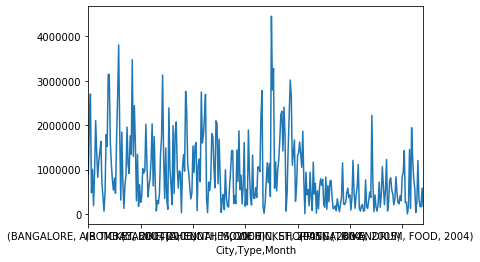

In [152]:
# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.
df = CustomersMergedDF.groupby(['City','Type', pd.to_datetime(CustomersMergedDF.Month).dt.year])['Amount'].sum()
display(df)

df.plot()

City        Month
BANGALORE   1        1.279050e+07
            2        1.080895e+07
            3        9.540742e+06
            4        5.281767e+06
            5        8.530655e+06
                         ...     
TRIVANDRUM  8        4.295639e+05
            9        4.252111e+05
            10       9.057841e+04
            11       6.996059e+05
            12       3.864841e+05
Name: Amount, Length: 96, dtype: float64

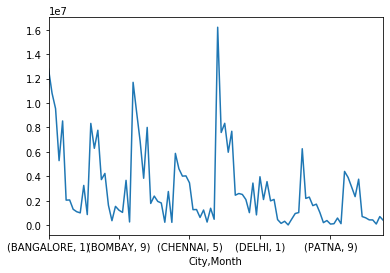

In [159]:
# 4. Create graphs for
# a. Monthly comparison of total spends, city wise

df = CustomersMergedDF.groupby(['City', pd.to_datetime(CustomersMergedDF.Month).dt.month])['Amount'].sum()
display(df)

df.plot()

Type        Month
AIR TICKET  2004     6.788959e+06
            2005     1.126036e+07
            2006     1.155897e+07
Name: Amount, dtype: float64

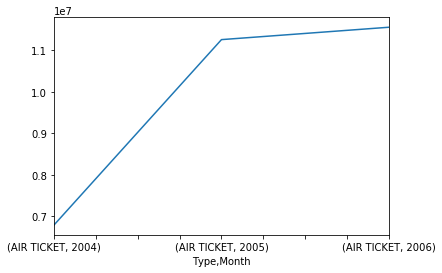

In [166]:
# b. Comparison of yearly spend on air tickets
df = CustomersMergedDF.loc[CustomersMergedDF.Type == 'AIR TICKET'].groupby(['Type', pd.to_datetime(CustomersMergedDF.Month).dt.year])['Amount'].sum()
display(df)

df.plot()

Type          Month
AIR TICKET    1        5.418709e+06
              2        5.055970e+06
              3        2.689117e+06
              4        2.467360e+06
              5        6.009843e+06
                           ...     
TRAIN TICKET  8        5.767599e+05
              9        8.872026e+05
              10       6.287645e+04
              11       1.622896e+06
              12       1.080396e+05
Name: Amount, Length: 150, dtype: float64

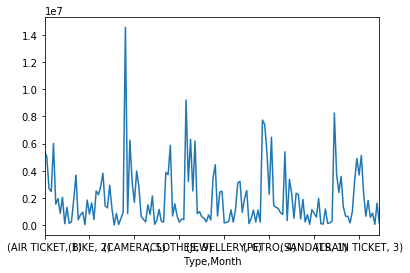

In [167]:
# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
df = CustomersMergedDF.groupby(['Type', pd.to_datetime(CustomersMergedDF.Month).dt.month])['Amount'].sum()
display(df)

df.plot()

In [216]:
# 5. Write user defined PYTHON function to perform the following analysis:
# You need to find top 10 customers for each city in terms of their repayment amount by
# different products and by different time periods i.e. year or month. The user should be able
# to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
# function should automatically take these inputs while identifying the top 10 customers.

import pandas as pd

class Test:
    def __init__(self, product, timePeriod,numOfRecords):
        self.product = product
        self.timePeriod = timePeriod
        self.numOfRecords = numOfRecords
        
    def GetTopCustomers(self):
        if self.timePeriod == 'month':
            df = (CustomersRepaymentMergedDF.loc[CustomersRepaymentMergedDF.Product == self.product].sort_values('Amount',ascending=False).groupby(['City',pd.to_datetime(CustomersMergedDF.Month).dt.year,pd.to_datetime(CustomersMergedDF.Month).dt.month,'Customer'])['Amount'].sum().head(self.numOfRecords))
        elif self.timePeriod == 'year':
            df = (CustomersRepaymentMergedDF.loc[CustomersRepaymentMergedDF.Product == self.product].sort_values('Amount',ascending=False).groupby(['City',pd.to_datetime(CustomersMergedDF.Month).dt.year,'Customer'])['Amount'].sum().head(self.numOfRecords))
                
        return df

    
obj = Test('Silver','month', 10)
obj.GetTopCustomers()

City       Month  Month  Customer
BANGALORE  2004   1      A18         414941.335845
                         A23         585692.140774
                         A59         397848.955271
                  2      A59         100003.000000
                         A72         100000.000000
                  4      A23         179384.974351
                         A59         100003.000000
                  5      A23         100001.000000
                  9      A18         100000.000000
           2005   2      A18          95861.342739
Name: Amount, dtype: float64